In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from matplotlib.ticker import FormatStrFormatter

In [41]:
path_original = "../../../data/phm_data_challenge/recipe/dataset_for_each_recipe/training/training_recipe_67.csv"
df_original = pd.read_csv(path_original)

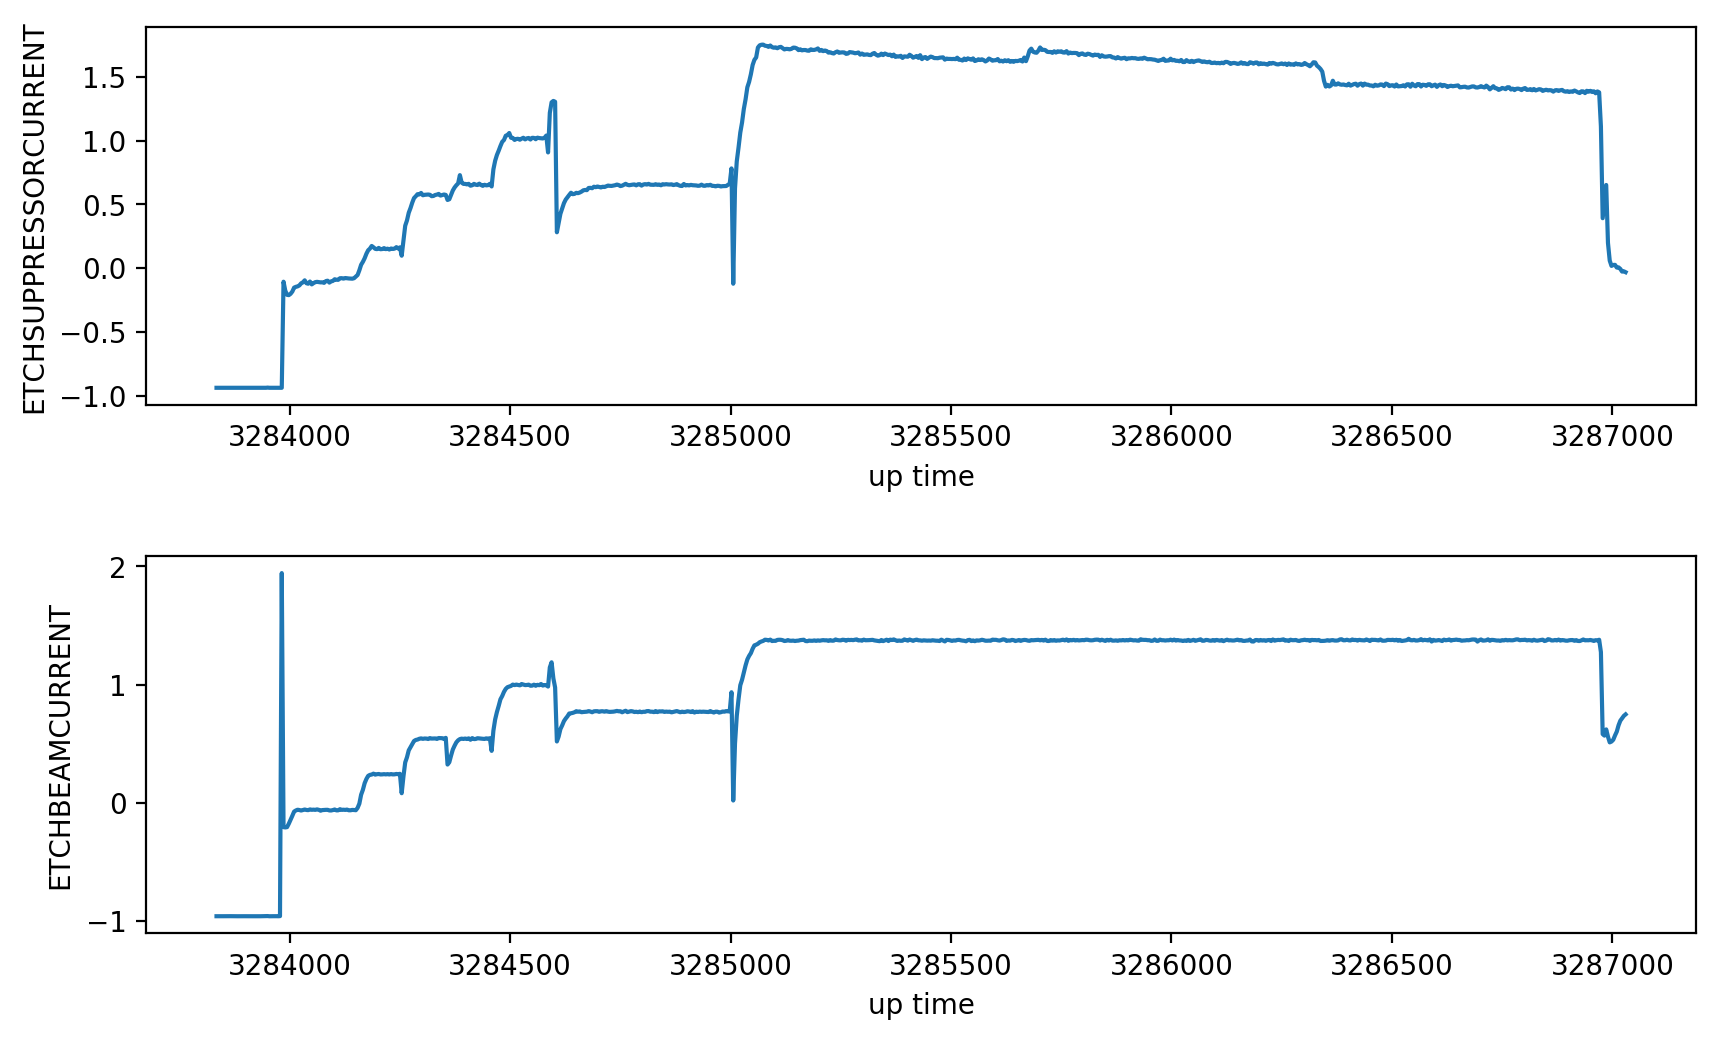

In [43]:
subplot = df_original.iloc[0:800,:]
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200) #  
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
sns.lineplot(x=subplot["up time"], y=subplot.iloc[:,10], ax=ax[0])
sns.lineplot(x=subplot["up time"], y=subplot.iloc[:,8], ax=ax[1])
#plt.savefig("../graphs/raw_sensor_data.png")
#ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>

In [45]:
df_original = df_original.drop(["ID", "stage", "Lot", "runnum", "recipe", "recipe_step",
                            "up time", "ongoing time", 
                            "ETCHSOURCEUSAGE", "ETCHAUXSOURCETIMER", 
                            "ETCHAUX2SOURCETIMER", "FIXTURESHUTTERPOSITION", "ROTATIONSPEED"
                           ], axis=1)

In [14]:
for i in range(0, df_original.shape[0]):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for: IONGAUGEPRESSURE
p-value: 6.204981239258703e-30
Time series is stationary
----------
Test for: ETCHBEAMVOLTAGE
p-value: 4.406502967181561e-20
Time series is stationary
----------
Test for: ETCHBEAMCURRENT
p-value: 1.1529534497799377e-15
Time series is stationary
----------
Test for: ETCHSUPPRESSORVOLTAGE
p-value: 6.563916241899777e-20
Time series is stationary
----------
Test for: ETCHSUPPRESSORCURRENT
p-value: 1.2633259378484242e-13
Time series is stationary
----------
Test for: FLOWCOOLFLOWRATE
p-value: 2.7698635333493377e-23
Time series is stationary
----------
Test for: FLOWCOOLPRESSURE
p-value: 2.398484725077666e-27
Time series is stationary
----------
Test for: ETCHGASCHANNEL1READBACK
p-value: 1.8950130642499044e-25
Time series is stationary
----------
Test for: ETCHPBNGASREADBACK
p-value: 0.0
Time series is stationary
----------
Test for: FIXTURETILTANGLE
p-value: 6.2962268554259605e-24
Time series is stationary
----------
Test for: ACTUALROTATIONANGLE
p-value: 0.00014

IndexError: single positional indexer is out-of-bounds

## Different Recipes in Dataset
Hole Dataset contains 10 different recipes.

In [29]:
df_original.recipe.unique()

array([67, 68, 66, 73, 69, 71, 72, 70, 74, 76])

Samples per recipes:

In [30]:
df_original.recipe.value_counts()

67    488363
66    274339
68    122744
69     28953
71     10345
74      5297
72      3883
70      2660
73      1962
76      1221
Name: recipe, dtype: int64

## Recipes of Training Dataset
Training dataset contains 4 different recipes: 

In [97]:
training_dataset = df_original.iloc[:60000,:]
training_dataset.recipe.unique()

array([67, 68, 66, 73, 69])

Samples per recipes:

In [98]:
training_dataset.recipe.value_counts()

67    29514
66    19140
68     8435
69     2394
73      517
Name: recipe, dtype: int64

Only recipes No. 66, 67 and 68 are choosen because the rest hast to less samples. <br>
These 4 recipes make up 94% of total data set: 

In [99]:
885446 / df_original.shape[0] 

0.9421973744555832

## Correlation of sensor time series

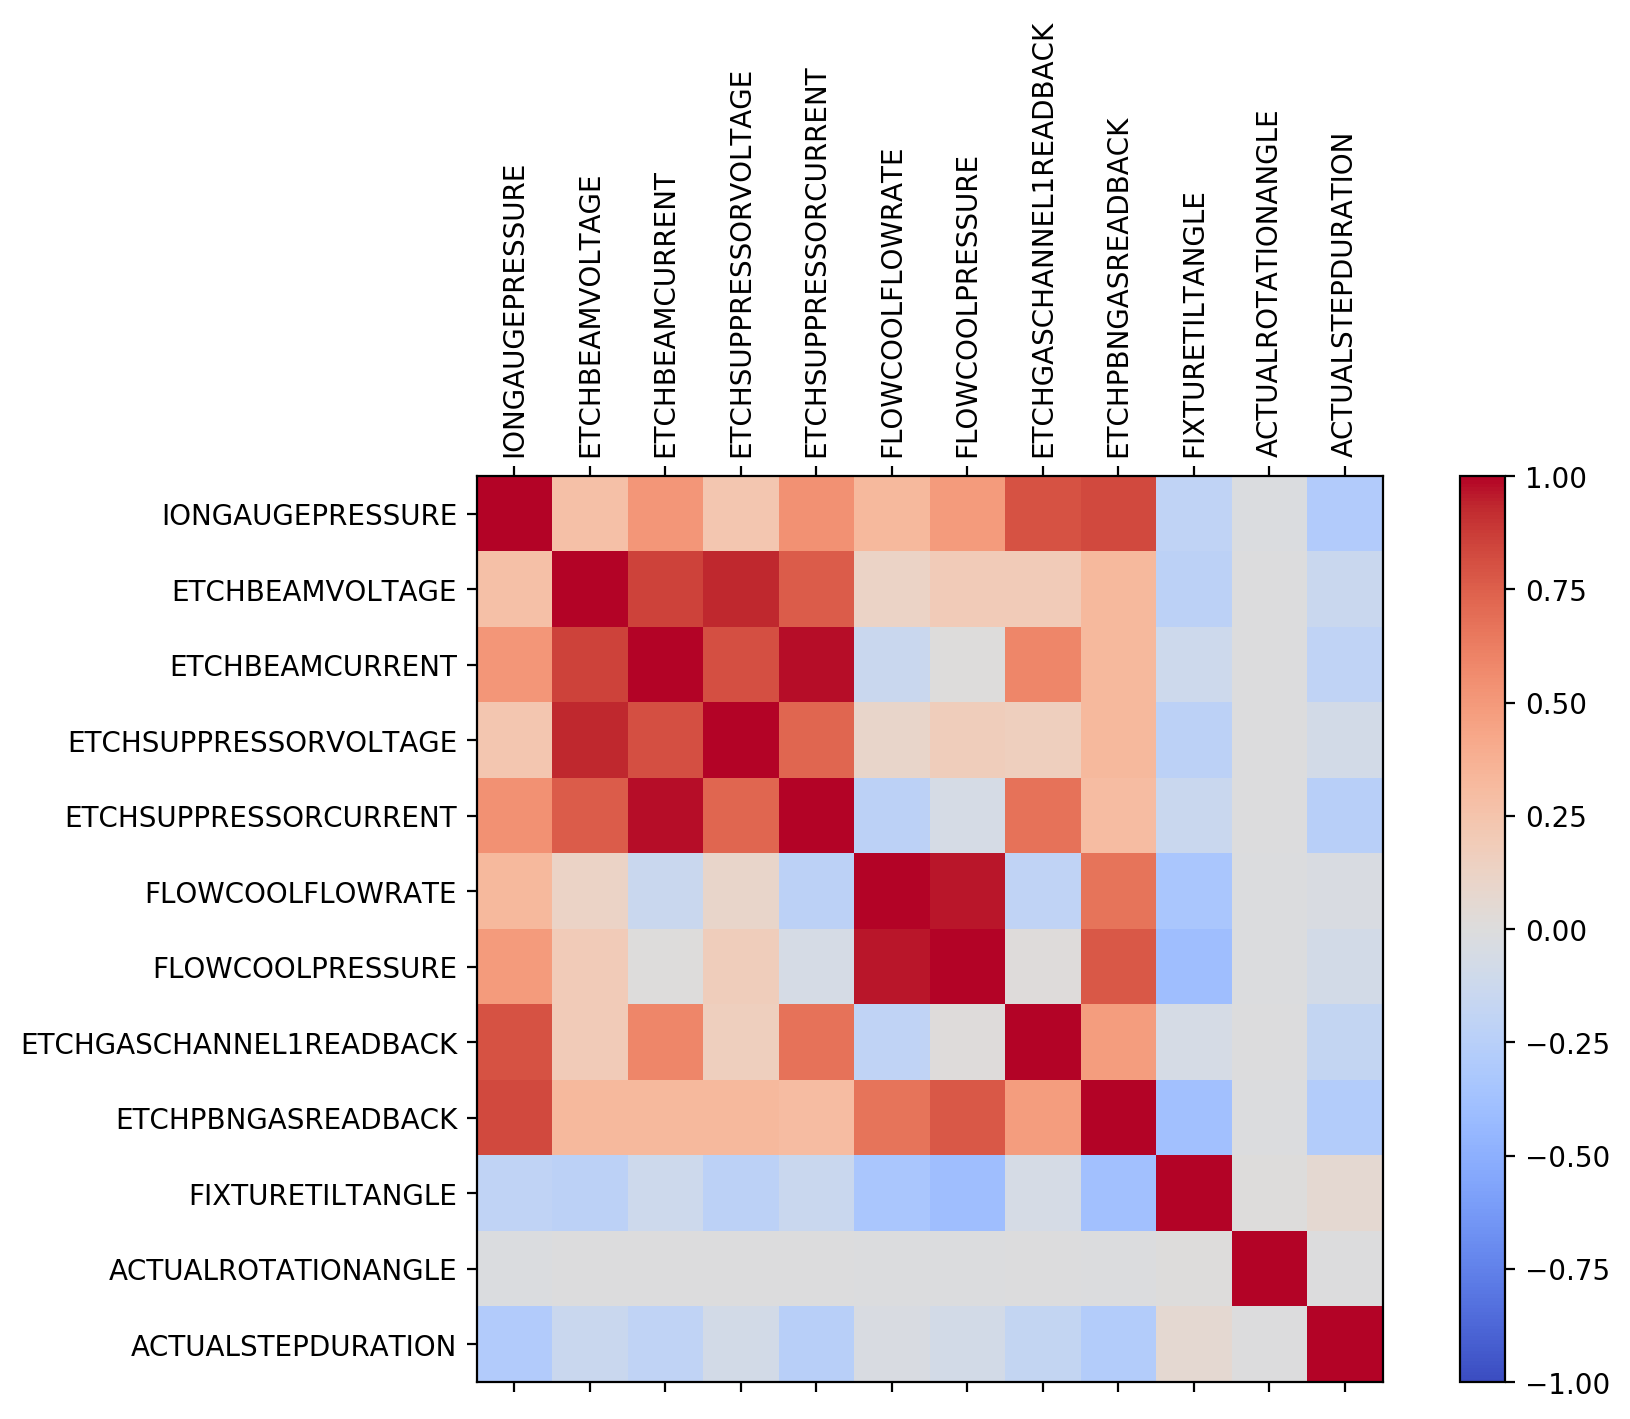

In [46]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,6), dpi=200)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

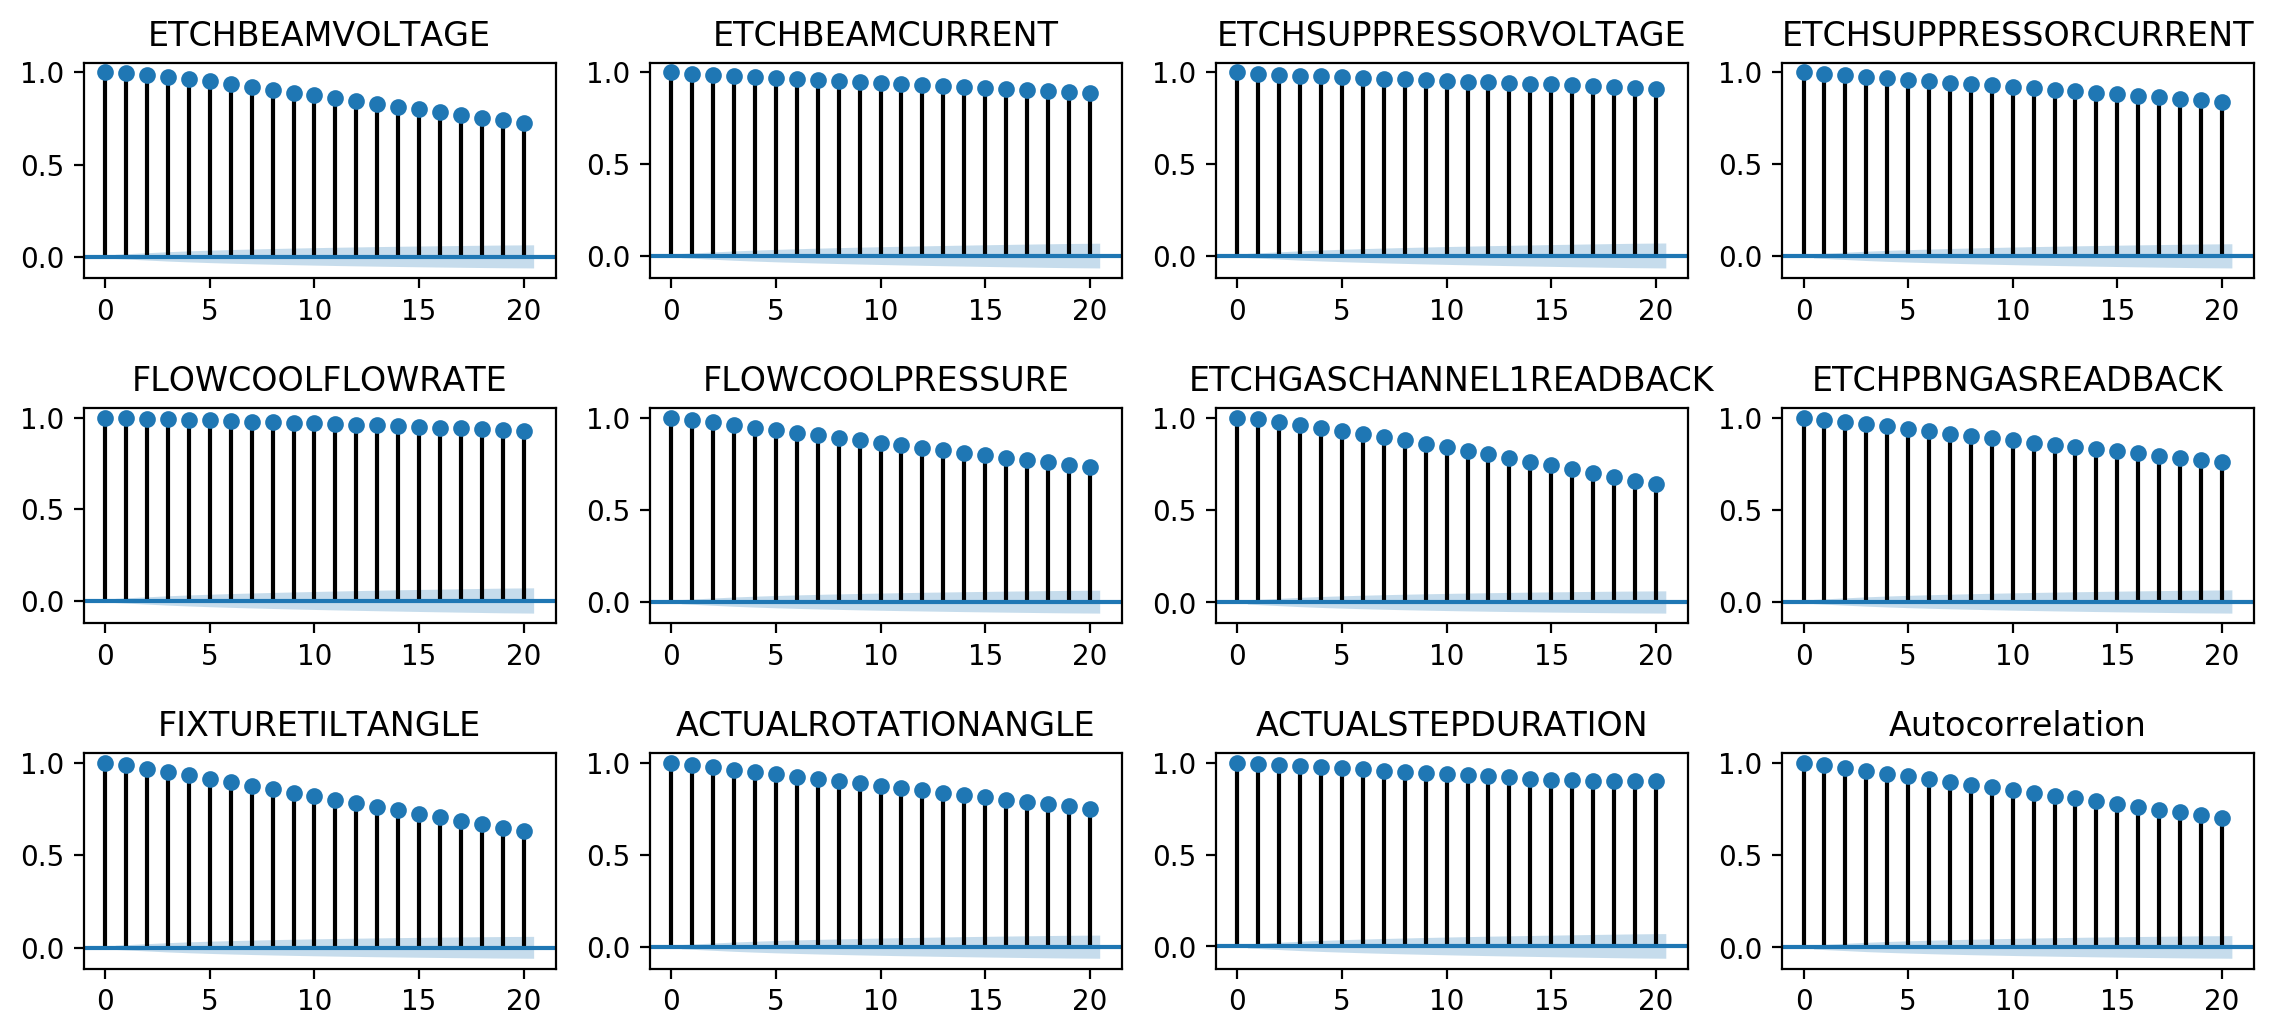

In [63]:
fig, axes = plt.subplots(3, 4, figsize=(14,6), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0,12):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i])
    ax[i-1].set_title(df_original.columns[i])
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

## Histogramm 

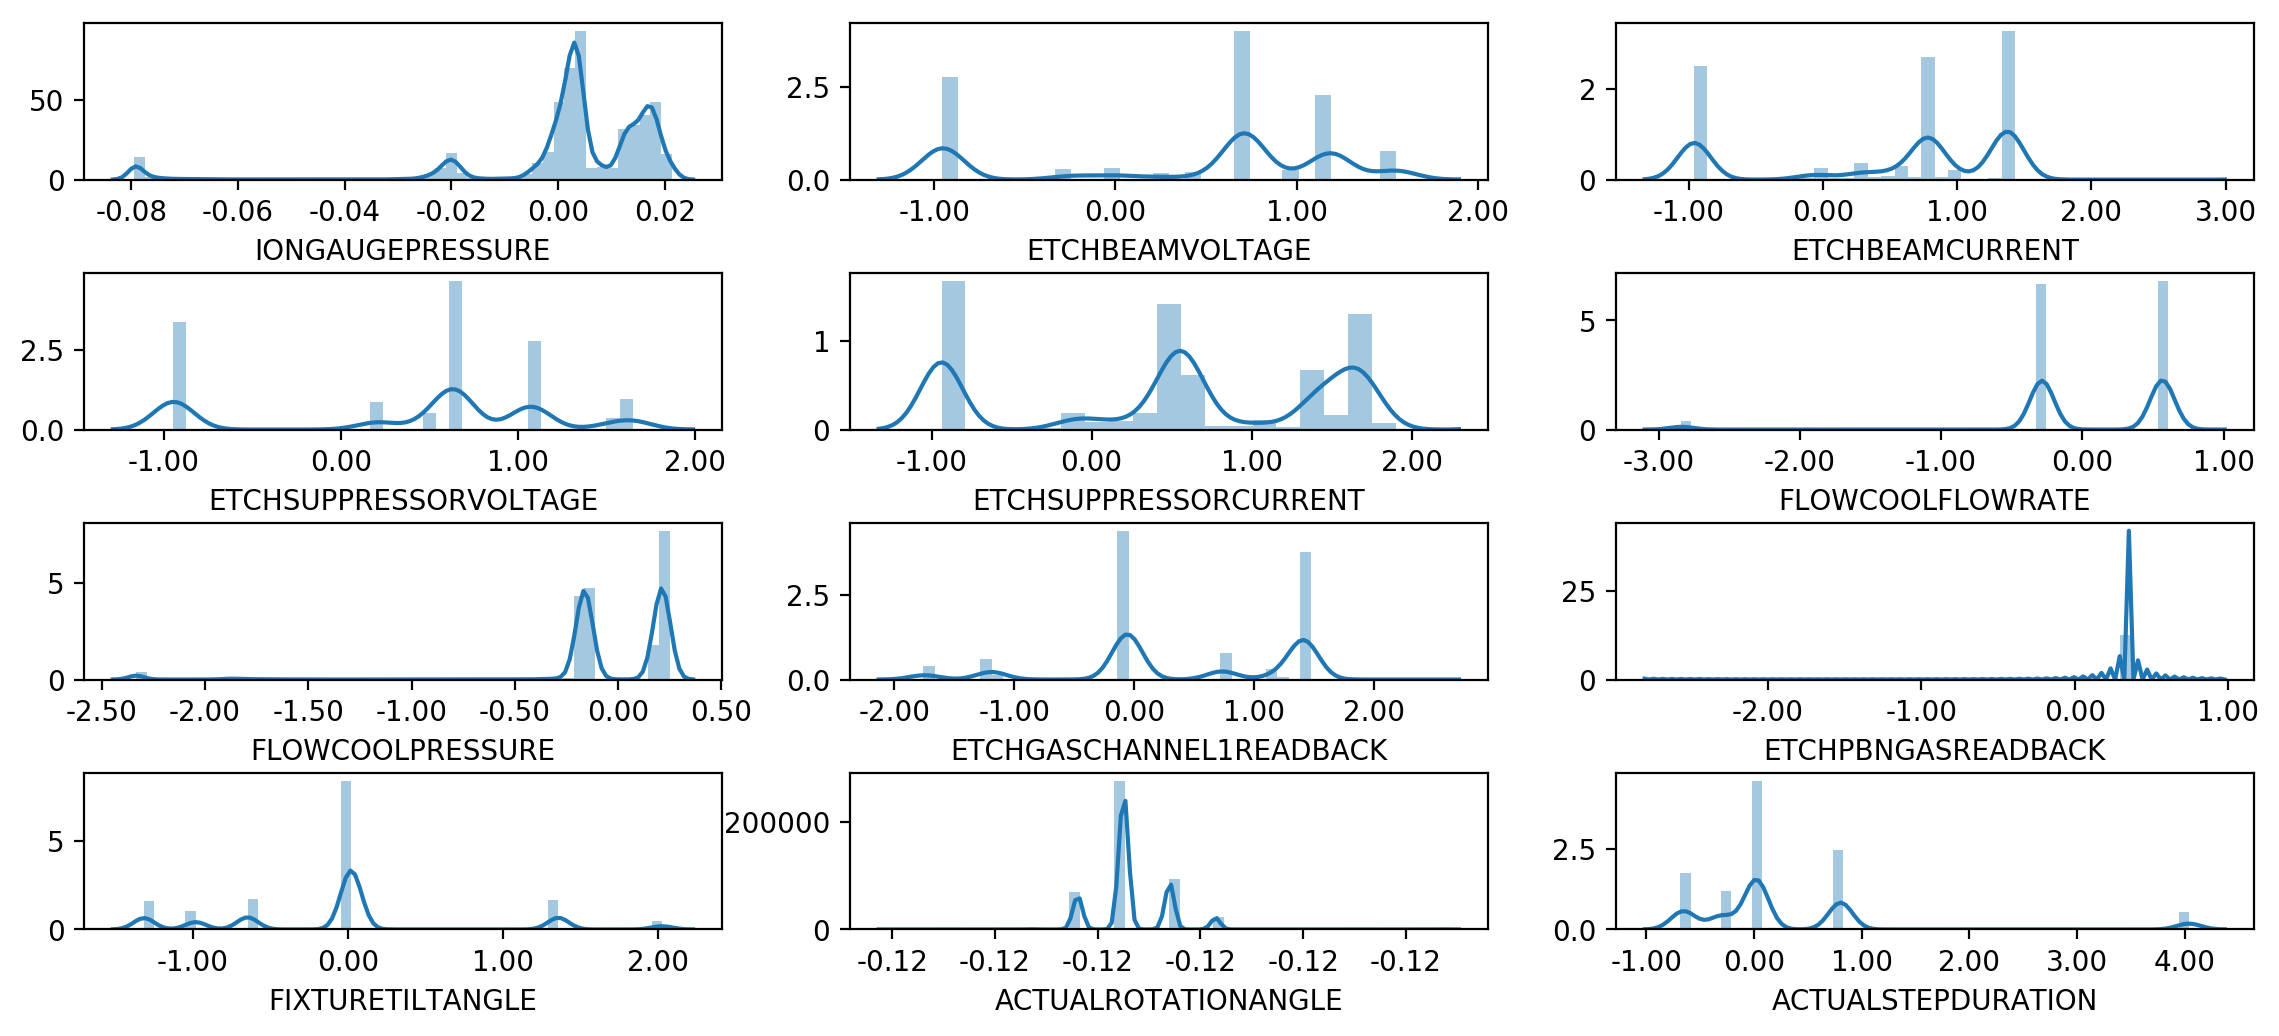

In [62]:
fig, axes = plt.subplots(4, 3, figsize=(14,6), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0, 12):
    sns.distplot(df_original.iloc[:,i], ax=ax[i])
    ax[i].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

## Recipe during Breakdowns
### 1. Breakdown

In [3]:
df_original.loc[df_original["ongoing time"]==3907068]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
131033,131034,01M02,1,9361,10548007,67,43,-0.022398,1.188755,0.789706,...,0.022131,-0.013207,-0.122455,1.0,2.787074,3.30981,3.631607,0.803526,3907068,3807966


### 2. Breakdown

In [4]:
df_original.loc[df_original["ongoing time"]==3915068]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
132694,132695,01M02,1,9361,10548007,67,43,-0.024606,1.188301,0.782401,...,0.022131,-0.013207,-0.122455,1.0,2.791552,3.31482,3.636816,0.803526,3915068,3814610


### 3. Breakdown

In [5]:
df_original.loc[df_original["ongoing time"]==3916348]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
133014,133015,01M02,1,9361,10548007,67,45,-0.079514,-0.958587,-0.959084,...,0.022131,-0.013207,2.239236,0.0,2.791805,3.315107,3.637114,0.803526,3916348,3815890


### 4. Breakdown

In [6]:
df_original.loc[df_original["ongoing time"]==3916820]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
133132,133133,01M02,1,9361,10548007,67,45,-0.079474,-0.958814,-0.959368,...,0.022131,-0.013207,2.23823,0.0,2.791805,3.315107,3.637114,0.803526,3916820,3816362


### 5. Breakdown

In [7]:
df_original.loc[df_original["ongoing time"]==3918308]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
133468,133469,01M02,88,9384,10548007,68,3,-0.007567,1.545977,0.768358,...,-0.200727,-0.013207,-0.122464,1.0,2.792435,3.315814,3.637849,0.803526,3918308,3817706


### 6. Breakdown

In [8]:
df_original.loc[df_original["ongoing time"]==3937492]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
138264,138265,01M02,88,9384,10548007,68,7,0.017439,0.70993,1.373607,...,-1.4933,-0.013207,-0.122473,1.0,2.793076,3.316528,3.638591,0.516616,3937492,3836890


### 7. Breakdown

In [9]:
df_original.loc[df_original["ongoing time"]==3940156]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
138930,138931,01M02,88,9384,10548007,68,9,-0.079465,-0.95853,-0.959297,...,-0.200727,-0.013207,5.55129,0.0,2.793329,3.316815,3.63889,0.018436,3940156,3839554


### 8. Breakdown

In [10]:
df_original.loc[df_original["ongoing time"]==3958952]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
143213,143214,01M02,1,9194,10551521,67,39,0.010599,-0.952501,-0.959297,...,0.022131,-0.013207,-0.122455,1.0,2.801807,3.326319,3.648771,0.021044,3958952,3856686


### 9. Breakdown

In [11]:
df_original.loc[df_original["ongoing time"]==3962388]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
144072,144073,01M02,1,9194,10551521,67,49,0.011108,1.187162,0.786655,...,0.022131,-0.013207,-0.122455,1.0,2.802185,3.326749,3.649218,0.803526,3962388,3860122


### 10. Breakdown

In [12]:
df_original.loc[df_original["ongoing time"]==3968456]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
145342,145343,01M02,1,9194,10551521,67,38,0.009591,-0.952672,-0.959297,...,0.022131,-0.013207,-0.122482,1.0,2.806013,3.331032,3.65367,0.021044,3968456,3865202


### 11. Breakdown

In [13]:
df_original.loc[df_original["ongoing time"]==3970900]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
145953,145954,01M02,1,9194,10551521,67,44,-0.079523,-0.958928,-0.959297,...,0.022131,-0.013207,4.530131,0.0,2.806265,3.331315,3.653965,0.803526,3970900,3867646


### 12. Breakdown

In [14]:
df_original.loc[df_original["ongoing time"]==3971424]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
146084,146085,01M02,1,9194,10551521,67,46,-0.05047,-0.840118,-0.959509,...,-0.646442,-0.013207,-0.122455,0.0,2.806268,3.331319,3.653969,0.803526,3971424,3868170


### 13. Breakdown

In [15]:
df_original.loc[df_original["ongoing time"]==3973348]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
146565,146566,01M02,1,9194,10551521,67,52,-0.079494,-0.959099,-0.95958,...,-0.646442,-0.013207,-0.122464,0.0,2.806501,3.331583,3.654243,0.803526,3973348,3870094


### 14. Breakdown

In [16]:
df_original.loc[df_original["ongoing time"]==8059956]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
813922,813923,01M02,1,9289,10810825,67,38,-0.02367,-0.94852,-0.959084,...,0.022131,-0.013207,-0.122437,1.0,0.522438,0.776229,0.997634,0.021044,8059956,6539522


### 15. Breakdown

In [17]:
df_original.loc[df_original["ongoing time"]==8072052]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
816430,816431,01M02,1,9289,10810825,67,25,0.013171,0.711466,1.375094,...,0.022131,-0.013207,-0.122455,1.0,0.523792,0.77775,0.999215,-0.30499,8072052,6549554


### 16. Breakdown

In [26]:
df_original.loc[df_original["ongoing time"]==8095040]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
822148,822149,01M02,1,9289,10810825,67,31,-0.079501,-0.958303,-0.958587,...,2.027848,-0.013207,-0.122437,0.0,0.524087,0.77808,0.999558,-0.761438,8095040,6572426


### 17. Breakdown

In [19]:
df_original.loc[df_original["ongoing time"]==8123030]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
822332,822333,01M02,1,9295,10815254,67,19,0.013694,0.950167,0.990015,...,-0.646442,-0.013207,-0.122455,1.0,0.526125,0.780385,1.001955,-0.68319,8123030,6573162


### 18. Breakdown

In [20]:
df_original.loc[df_original["ongoing time"]==8124434]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
822683,822684,01M02,1,9295,10815254,67,25,-0.079423,-0.958701,-0.958658,...,-0.980728,-0.013207,2.309057,0.0,0.526417,0.780716,1.002298,-0.657107,8124434,6574566


### 19. Breakdown

In [21]:
df_original.loc[df_original["ongoing time"]==8124986]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
822821,822822,01M02,1,9295,10815254,67,27,-0.079422,-0.958246,-0.958942,...,-0.646442,-0.013207,-0.122464,0.0,0.526417,0.780716,1.002298,-0.657107,8124986,6575118


### 20. Breakdown

In [22]:
df_original.loc[df_original["ongoing time"]==8125434]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
822933,822934,01M02,1,9295,10815254,67,37,-0.075054,-0.959042,-0.959013,...,2.027848,-0.013207,-0.122455,0.0,0.526652,0.780983,1.002576,-0.30499,8125434,6575566


### 21. Breakdown

In [23]:
df_original.loc[df_original["ongoing time"]==8127122]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
823355,823356,01M02,1,9295,10815254,67,43,0.01422,0.71033,1.244443,...,-0.646442,-0.013207,-0.122446,0.0,0.526848,0.781209,1.002811,-0.30499,8127122,6577254


### 22. Breakdown

In [24]:
df_original.loc[df_original["ongoing time"]==8132486]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
824667,824668,01M02,88,9553,10815254,68,3,-0.008772,1.546833,0.770982,...,-0.200727,-0.013207,-0.122455,1.0,0.53073,0.785558,1.007333,-0.604941,8132486,6582502


### 23. Breakdown

In [25]:
df_original.loc[df_original["ongoing time"]==8136006]

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
825547,825548,01M02,88,9553,10815254,68,7,-0.078969,-0.958473,-0.958445,...,2.027848,-0.013207,4.725692,0.0,0.531024,0.785888,1.007676,-0.604941,8136006,6586022
